## EDA -1 
## About - Dataset:-
- The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

## Title: Bike Details Dataset
Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.


The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market

## Title: Bike Details Dataset 
- name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
- selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
- year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
- seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
- owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
- km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
- ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('BIKE_DETAILS.csv')

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.shape

(1061, 7)

In [5]:
df.dropna()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
# 1. What is the range of selling prices in the dataset?
range = df['selling_price'].max() - df['selling_price'].min()
print("Range of selling prices: ", range)

Range of selling prices:  755000


In [9]:
# 2. What is the median selling price for bikes in the dataset?
median_price = df['selling_price'].median()
print("Median selling price: ", median_price)

Median selling price:  45000.0


In [10]:
# 3. What is the most common seller type?
most_common_seller_type = df['seller_type'].mode()[0]
print("Most common seller type: ", most_common_seller_type)

Most common seller type:  Individual


In [11]:
# 4. How many bikes have driven more than 50,000 kilometers?
bikes_above_50k = df[df['km_driven'] > 50000].shape[0]
print("Number of bikes driven more than 50,000 kilometers: ", bikes_above_50k)

Number of bikes driven more than 50,000 kilometers:  170


In [12]:
# 5. What is the average km_driven value for each ownership type?
average_km_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven by ownership type: ")
print(average_km_by_ownership)

Average km_driven by ownership type: 
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [13]:
# 6. What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
total_bikes = df.shape[0]
proportion_2015_or_older = bikes_2015_or_older / total_bikes
print("Proportion of bikes from 2015 or older: ", proportion_2015_or_older)

Proportion of bikes from 2015 or older:  0.5664467483506126


In [14]:
# 7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing values in each column: ")
print(missing_values)

Missing values in each column: 
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [15]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = df['ex_showroom_price'].max()
highest_bike = df[df['ex_showroom_price'] == highest_ex_showroom_price]
print("Highest ex_showroom_price: ", highest_ex_showroom_price)
print("Bike with highest ex_showroom_price: ")
print(highest_bike[['name', 'ex_showroom_price']])

Highest ex_showroom_price:  1278000.0
Bike with highest ex_showroom_price: 
                           name  ex_showroom_price
134  Harley-Davidson Street Bob          1278000.0


In [16]:
# 9. What is the total number of bikes listed by each seller type?
total_bikes_by_seller_type = df['seller_type'].value_counts()
print("Total number of bikes listed by each seller type: ")
print(total_bikes_by_seller_type)

Total number of bikes listed by each seller type: 
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [17]:
df.head(1)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN


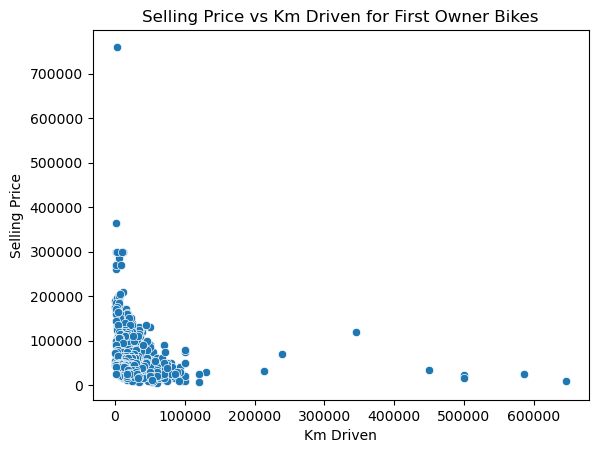

In [18]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df[df['owner'] == '1st owner'], x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven for First Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

In [19]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print("Number of rows before removing outliers: ", df.shape[0])
print("Number of rows after removing outliers: ", df_no_outliers.shape[0])

Number of rows before removing outliers:  1061
Number of rows after removing outliers:  1022


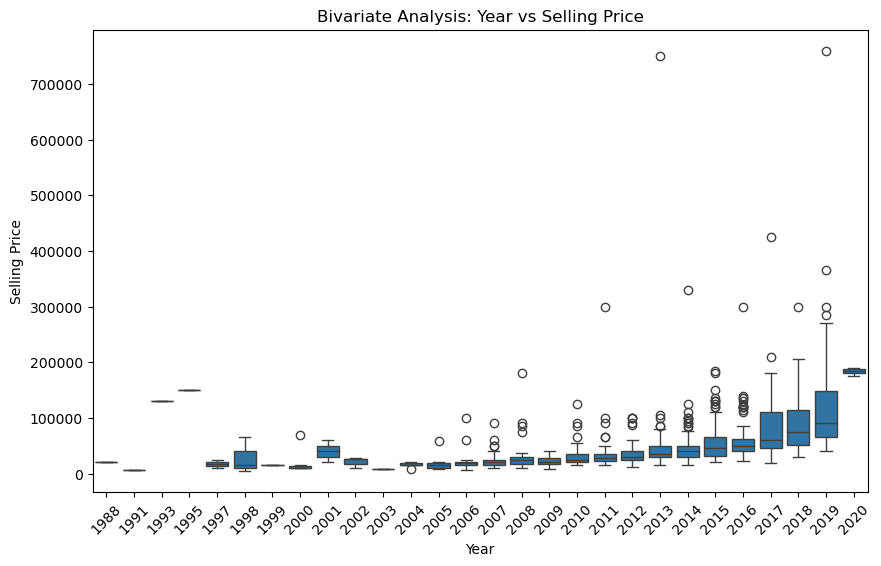

In [20]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='selling_price')
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

In [21]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).
current_year = 2023
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean()
print("Average depreciation in selling price based on bike's age: ")
print(average_depreciation)

Average depreciation in selling price based on bike's age: 
age
3     183333.333333
4     119689.511628
5      87660.374046
6      78894.736842
7      58469.018692
8      56500.000000
9      48668.131868
10     51136.986301
11     35748.400000
12     35655.721311
13     31793.333333
14     22267.857143
15     34289.285714
16     24927.586207
17     23380.000000
18     16978.571429
19     15100.000000
20      8000.000000
21     20666.666667
22     40000.000000
23     20833.333333
24     15000.000000
25     28333.333333
26     17500.000000
28    150000.000000
30    130000.000000
32      6000.000000
35     20000.000000
Name: selling_price, dtype: float64


In [22]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
average_price_by_year = df.groupby('year')['selling_price'].mean()
df['average_price'] = df['year'].map(average_price_by_year)
df['price_difference'] = df['selling_price'] - df['average_price']
significantly_above_average = df[df['price_difference'] > 0]
print("Bikes priced significantly above the average price for their manufacturing year: ")
print(significantly_above_average[['name', 'year', 'selling_price', 'average_price', 'price_difference']])

Bikes priced significantly above the average price for their manufacturing year: 
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
...                                    ...   ...            ...   
1004                  Bajaj Pulsar  NS 200  2016          60000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1012                   Bajaj Pulsar NS 200  2014          50000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      average_price  price_difference  
0     119689.511628      55310.488372  
2      87660.374046      62339.62

Numeric columns in the dataset: 
['selling_price', 'year', 'km_driven', 'ex_showroom_price', 'age', 'average_price', 'price_difference']


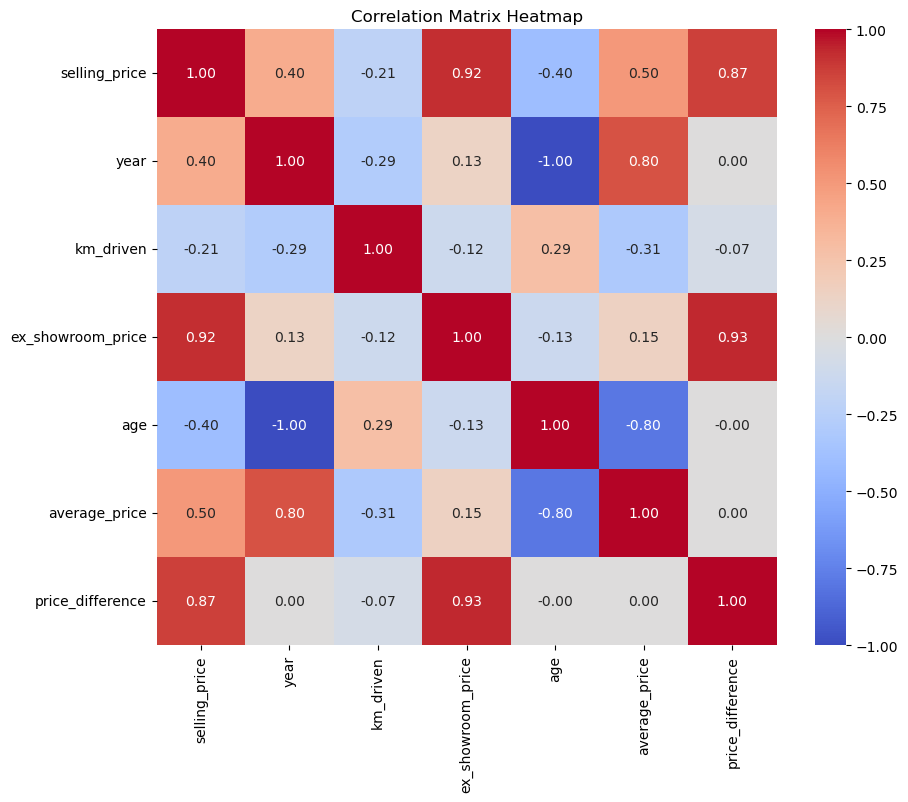

In [23]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap. with numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
# Display the numeric columns
print("Numeric columns in the dataset: ")
print(numeric_columns.columns.tolist())
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## EDA 2
## About - Dataset:

- The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

## Title: Car Sale Dataset
- Source:

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

- Description:

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

## Features:
- Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
- Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
- Customer Name: The name of the customer who purchased the car, represented as a string.
- Gender: The gender of the customer, categorized as "Male" or "Female..
- Annual Income: The customer's annual income in US dollars, represented as a numeric value.
- Dealer_Name: The name of the dealership selling the car, represented as a string.
- Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
- Model: The specific model name of the car, such as "Corolla," "Civic," etc.
- Engine: The engine type of the car, such as "V6," "I4," etc.
- Transmission: The type of transmission in the car, either "Manual" or "Automatic.
- Color: The color of the car, represented as a string (e.g., "Red," "Blue").
- Price ($): The selling price of the car in US dollars.
- Dealer_No: A unique identifier for each car dealer in the dataset.
- Body Style: The body style of the car, such as "Sedan," "SUV," etc.
- Phone: The phone number of the customer who purchased the car.
- Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

In [24]:
df1 = pd.read_csv('Car_Sale.csv')

In [25]:
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [26]:
df1.shape

(23906, 16)

In [27]:
df1.dropna(inplace=True)

In [28]:
df1.shape

(23905, 16)

In [29]:
df1.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23905 non-null  object
 1   Date           23905 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23905 non-null  object
 4   Annual Income  23905 non-null  int64 
 5   Dealer_Name    23905 non-null  object
 6   Company        23905 non-null  object
 7   Model          23905 non-null  object
 8   Engine         23905 non-null  object
 9   Transmission   23905 non-null  object
 10  Color          23905 non-null  object
 11  Price ($)      23905 non-null  int64 
 12  Dealer_No      23905 non-null  object
 13  Body Style     23905 non-null  object
 14  Phone          23905 non-null  int64 
 15  Dealer_Region  23905 non-null  object
dtypes: int64(3), object(13)
memory usage: 3.1+ MB


In [31]:
print(df1.columns)


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


In [32]:
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.strip().str.title()  # Makes 'date' → 'Date'


In [33]:
print(df1.columns)  # Confirm it's now 'Date'

Index(['Car_Id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')


In [34]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True, errors='coerce')
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

In [35]:
df1.drop(columns=['Date'], inplace=True)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23905 entries, 0 to 23905
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Id         23905 non-null  object 
 1   Customer Name  23905 non-null  object 
 2   Gender         23905 non-null  object 
 3   Annual Income  23905 non-null  int64  
 4   Dealer_Name    23905 non-null  object 
 5   Company        23905 non-null  object 
 6   Model          23905 non-null  object 
 7   Engine         23905 non-null  object 
 8   Transmission   23905 non-null  object 
 9   Color          23905 non-null  object 
 10  Price ($)      23905 non-null  int64  
 11  Dealer_No      23905 non-null  object 
 12  Body Style     23905 non-null  object 
 13  Phone          23905 non-null  int64  
 14  Dealer_Region  23905 non-null  object 
 15  Day            9779 non-null   float64
 16  Month          9779 non-null   float64
 17  Year           9779 non-null   float64
dtypes: float64(

In [37]:
## Feature Engineering
df1['Transmission'] = encoder.fit_transform(df1['Transmission'])

In [38]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
average_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
print("Average selling price of cars for each dealer: ")
print(average_price_by_dealer)

Average selling price of cars for each dealer: 
                                        Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Moto

In [39]:
# 2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
price_variation_by_brand = df1.groupby('Company')['Price ($)'].std().reset_index()
highest_variation_brand = price_variation_by_brand.loc[price_variation_by_brand['Price ($)'].idxmax()]
print("Car brand with the highest variation in prices: ")
print(highest_variation_brand)

Car brand with the highest variation in prices: 
Company           Lincoln
Price ($)    19658.050211
Name: 15, dtype: object


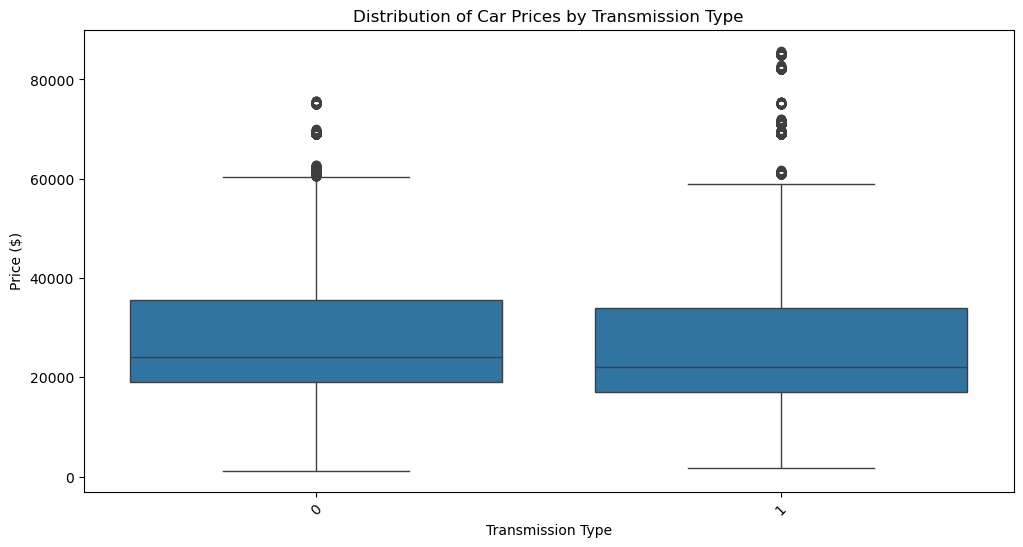

In [40]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare ?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Transmission', y='Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [41]:
df1.columns

Index(['Car_Id', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name',
       'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price ($)',
       'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region', 'Day', 'Month',
       'Year'],
      dtype='object')

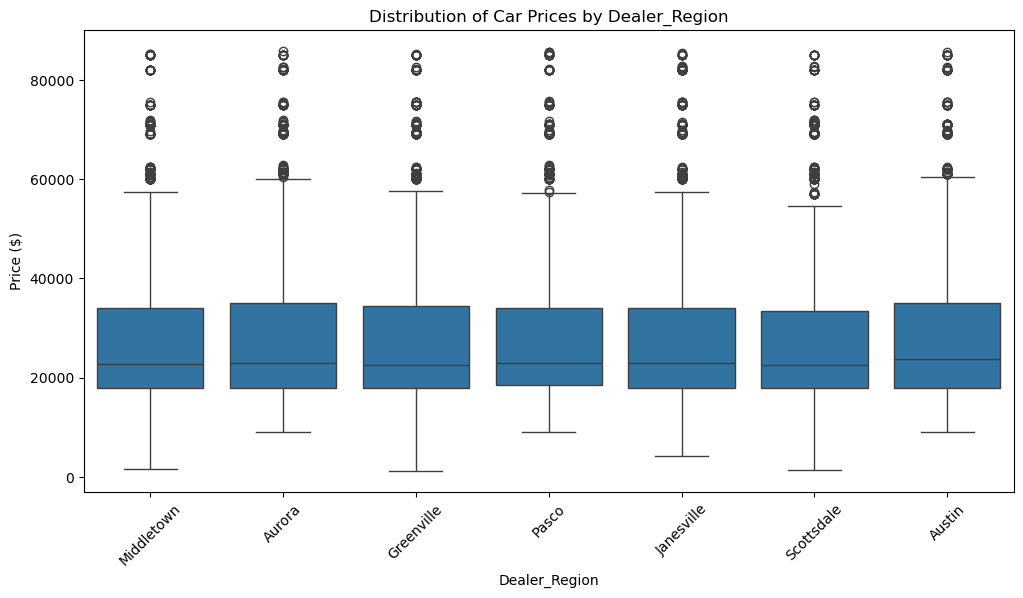

In [42]:
# 4. What is the distribution of car prices across different regions?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Dealer_Region', y='Price ($)')
plt.title('Distribution of Car Prices by Dealer_Region')
plt.xlabel('Dealer_Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

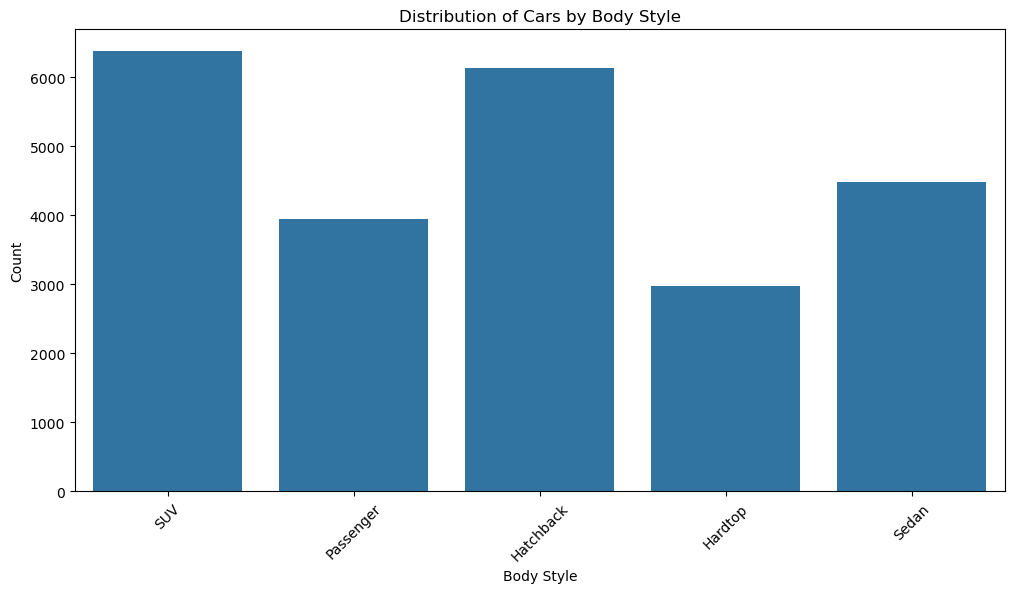

In [43]:
# 5. What is the distribution of cars based on body styles ?
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Body Style')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

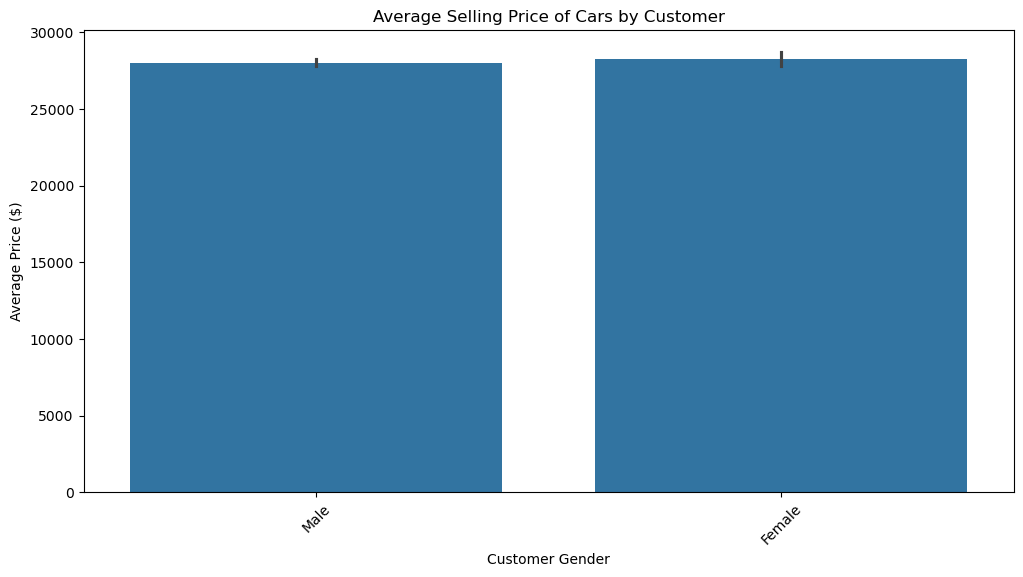

In [44]:
# 6. How does the average selling price of cars vary by customer gender and annual income?
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Gender' , y='Price ($)')
plt.title('Average Selling Price of Cars by Customer')
plt.xlabel('Customer Gender')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

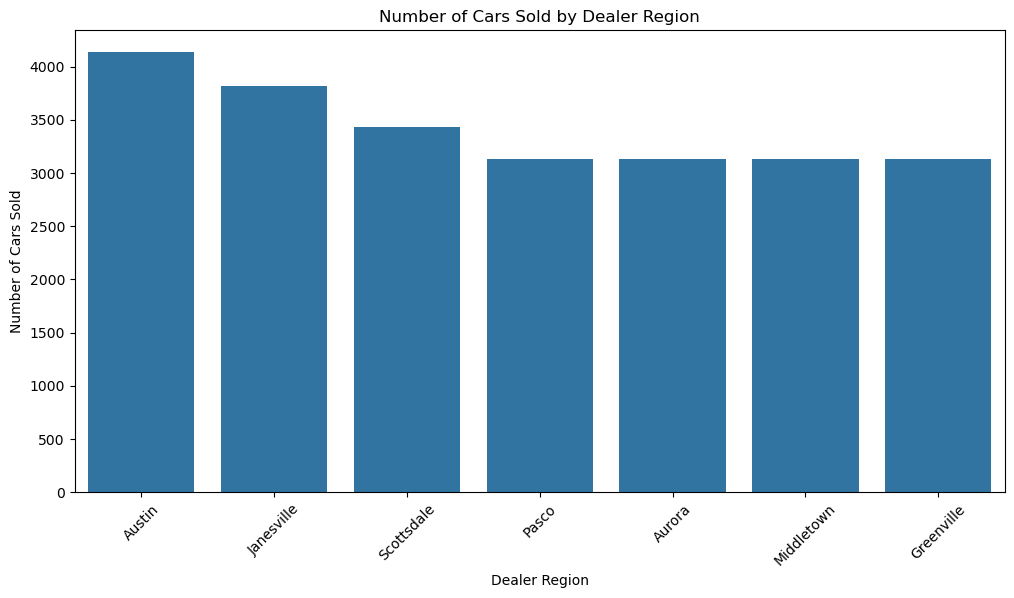

In [ ]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Dealer_Region', order=df1['Dealer_Region'].value_counts().index)
plt.title('Number of Cars Sold by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

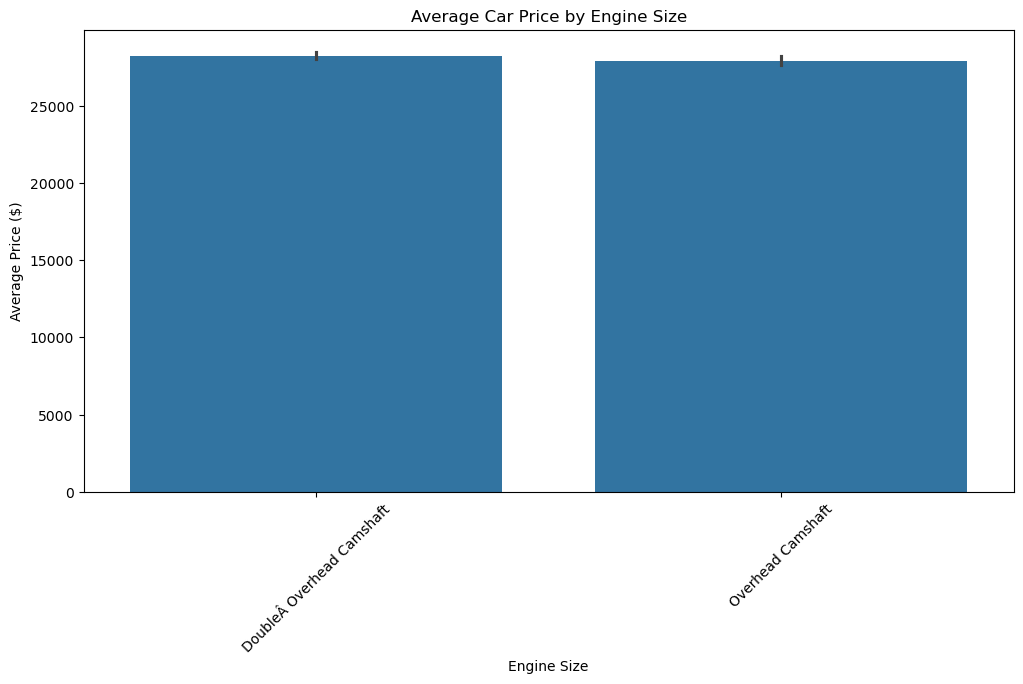

In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Engine', y='Price ($)')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

In [47]:
df1.head(1)

,Car_Id,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Day,Month,Year
0,C_CND_000001,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,0,Black,26000,06457-3834,SUV,8264678,Middletown,1.0,2.0,2022.0


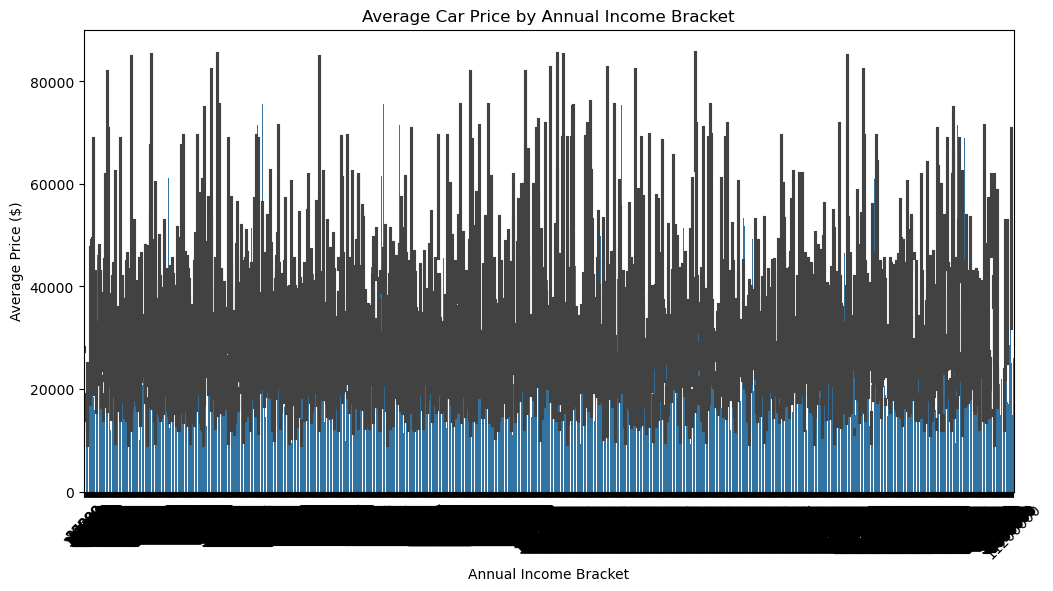

In [ ]:
# 9. How do car prices vary based on the customer’s annual income bracket?
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Annual Income', y='Price ($)')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

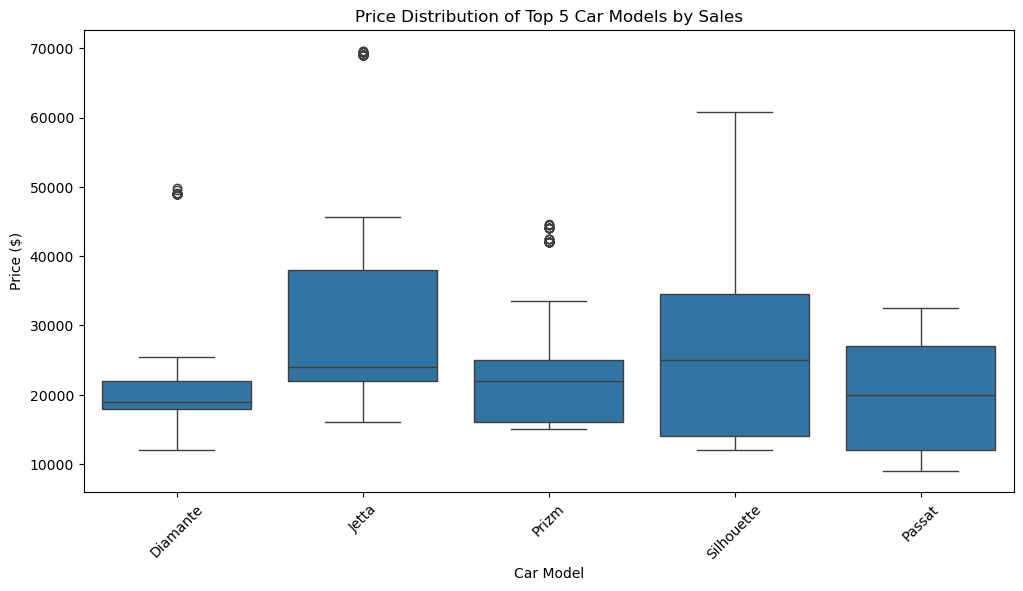

In [49]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_5_models = df1['Model'].value_counts().head(5).index
top_5_sales = df1[df1['Model'].isin(top_5_models)]
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_5_sales, x='Model', y='Price ($)')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [50]:
# Calculating the type of engine for each car.
df1['Engine'] = encoder.fit_transform(df1['Engine'])


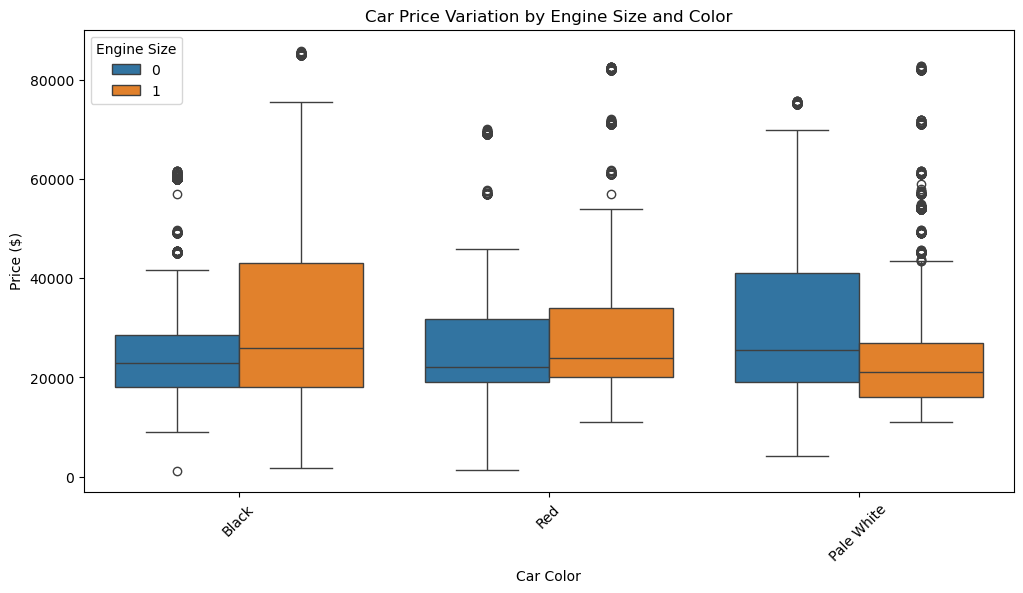

In [51]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Color', y='Price ($)', hue='Engine')
plt.title('Car Price Variation by Engine Size and Color')
plt.xlabel('Car Color')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Engine Size')
plt.show()


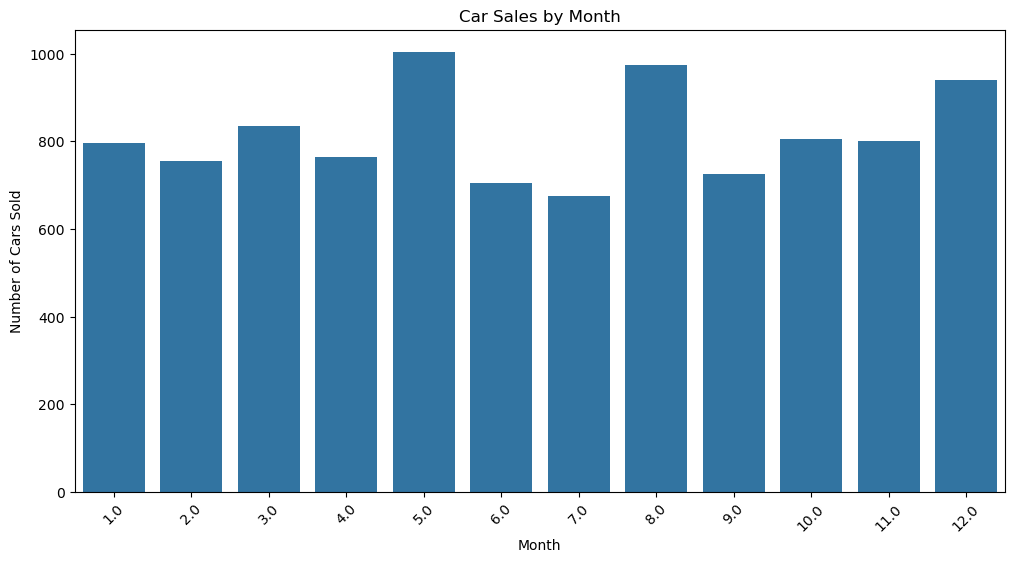

In [52]:
# 12. Is there any seasonal trend in car sales based on the date of sale?
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='Month')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

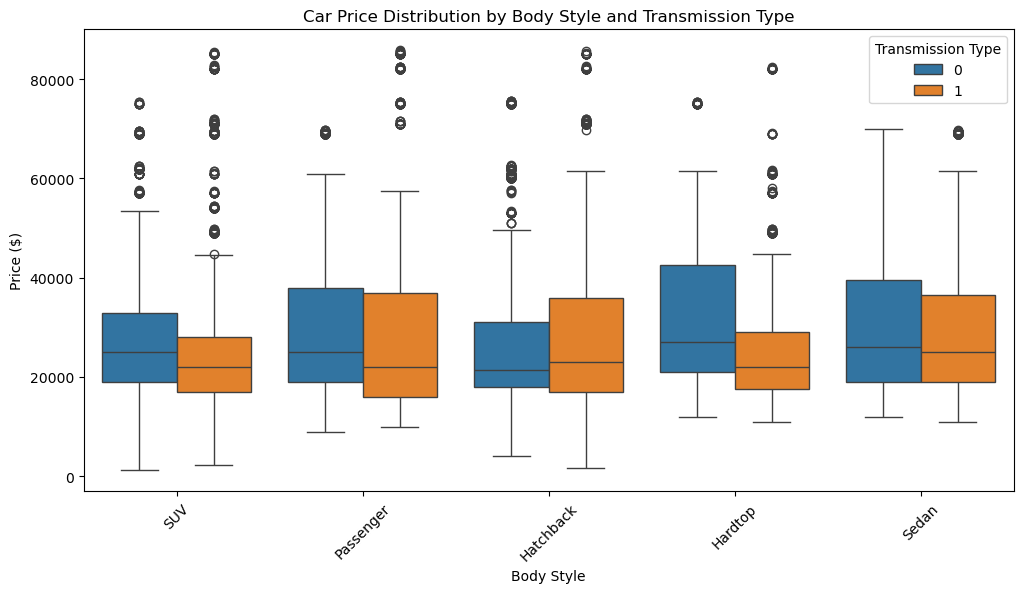

In [53]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Body Style', y='Price ($)', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.show()

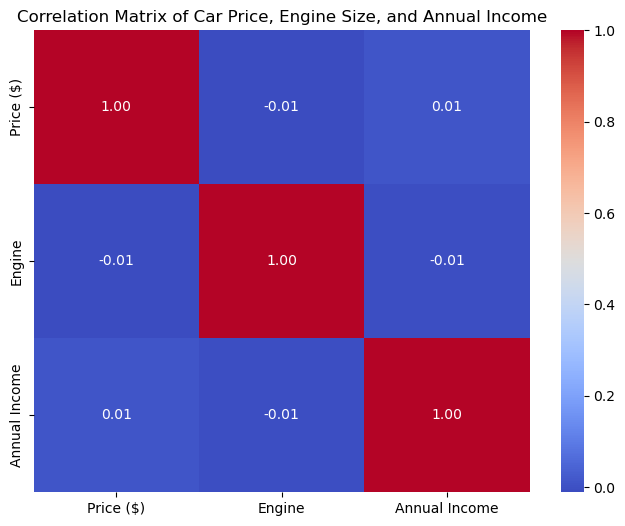

In [54]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
correlation_matrix_cars = df1[['Price ($)', 'Engine', 'Annual Income']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cars, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()

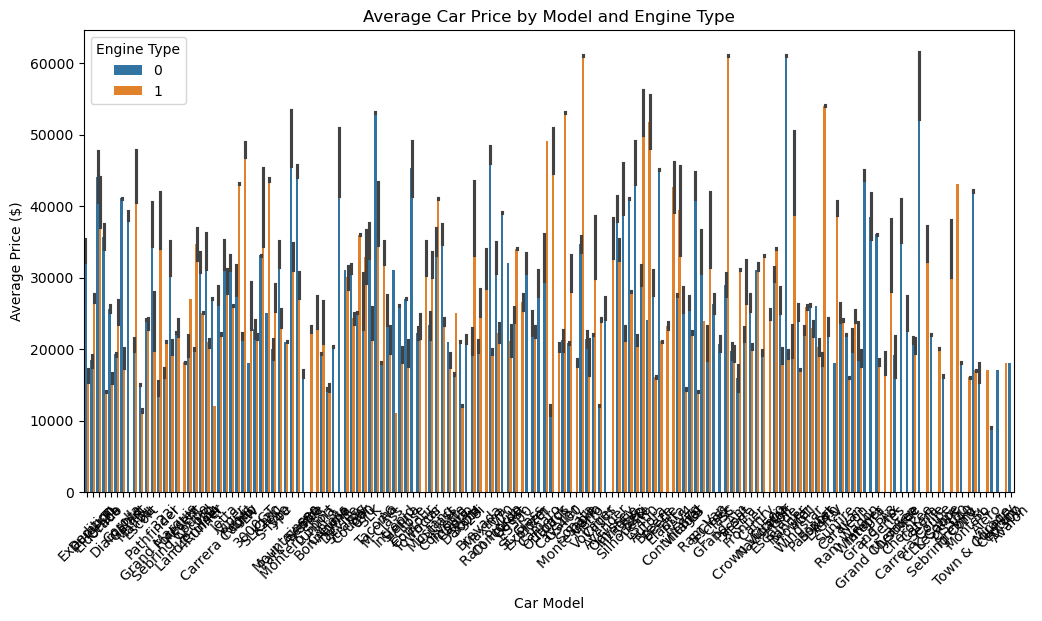

In [55]:
# 15. How does the average car price vary across different car models and engine types?
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Model', y='Price ($)', hue='Engine')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Engine Type')
plt.show()

## EDA - 3
##### Amazon Sales Data

- Description: This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

Features:

- product_id: Unique identifier for each product
- product_name: Name of the product
- category: Category of the product
- discounted_price: Discounted price of the product
- actual_price: Actual price of the product
- discount_percentage: Percentage of discount for the product
- rating: Rating of the product (1-5)
- rating_count: Number of people who voted for the Amazon rating
- about_product: Description about the product
- user_id: ID of the user who wrote the review
- user_name: Name of the user who wrote the review
- review_id: ID of the user review
- review_title: Short review
- review_content: Long review
- img_link: Image link of the product
- product_link: Official website link of the product


In [56]:
df2 = pd.read_csv('amazon.csv')
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [57]:
df2['category'].value_counts().unique()

array([233,  76,  68,  63,  52,  49,  27,  24,  23,  22,  20,  19,  18,
        16,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,
         2,   1])

In [58]:
# Encoding the 'category' column
df2['category'] = encoder.fit_transform(df2['category'])

In [59]:
df2['discount_percentage'] = df2['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df2['discounted_price'] = df2['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df2['rating_count'] = df2['rating_count'].str.replace(',', '').astype(float)


In [60]:
df2['category'].value_counts()


category
10     233
119     76
117     68
97      63
76      52
      ... 
60       1
46       1
83       1
199      1
185      1
Name: count, Length: 211, dtype: int64

In [61]:
df2['rating'].value_counts()


rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: count, dtype: int64

In [62]:
df2['rating_count'].value_counts()


rating_count
9378.0     9
18998.0    8
24269.0    7
43994.0    6
32840.0    5
          ..
17810.0    1
53648.0    1
2014.0     1
5958.0     1
6987.0     1
Name: count, Length: 1143, dtype: int64

In [63]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')
df2['rating_count'] = pd.to_numeric(df2['rating_count'], errors='coerce')

In [64]:
df2.dtypes

product_id              object
product_name            object
category                 int64
discounted_price       float64
actual_price            object
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [65]:
# 1. What is the average rating for each product category ?
average_rating_by_category = df2.groupby('category')['rating'].mean().reset_index()
print("Average rating for each product category: ")
print(average_rating_by_category)

Average rating for each product category: 
     category    rating
0           0  3.800000
1           1  4.150000
2           2  3.500000
3           3  3.600000
4           4  4.050000
..        ...       ...
206       206  4.250000
207       207  4.150000
208       208  4.300000
209       209  4.133333
210       210  4.300000

[211 rows x 2 columns]


In [66]:
# 2. What are the top rating_count products by category ?
top_rating_count_by_category = df2.groupby('category')['rating_count'].max().reset_index()
print("Top rating_count products by category: ")
print(top_rating_count_by_category)

Top rating_count products by category: 
     category  rating_count
0           0        1118.0
1           1        4426.0
2           2        7222.0
3           3       14969.0
4           4        7352.0
..        ...           ...
206       206        5792.0
207       207        6199.0
208       208        5719.0
209       209        4308.0
210       210       15867.0

[211 rows x 2 columns]


In [67]:
# 3. What is the distribution of discounted prices vs. actual prices ?
discounted_vs_actual_prices = df2[['discounted_price', 'actual_price']].describe()
print("Distribution of discounted prices vs. actual prices: ")
print(discounted_vs_actual_prices)

Distribution of discounted prices vs. actual prices: 
       discounted_price
count       1465.000000
mean        3125.310874
std         6944.304394
min           39.000000
25%          325.000000
50%          799.000000
75%         1999.000000
max        77990.000000


In [68]:
# 4. How does the average discount percentage vary across categories ?
average_discount_by_category = df2.groupby('category')['discount_percentage'].mean().reset_index()
print("Average discount percentage by category: ")
print(average_discount_by_category)

Average discount percentage by category: 
     category  discount_percentage
0           0          2339.000000
1           1           221.500000
2           2           649.000000
3           3           574.000000
4           4           749.000000
..        ...                  ...
206       206           150.000000
207       207           255.000000
208       208           329.000000
209       209           244.333333
210       210           150.000000

[211 rows x 2 columns]


In [69]:
# 5. What are the most popular product names ?
popular_product_names = df2['product_name'].value_counts().head(10).reset_index()
print("Most popular product names: ")
print(popular_product_names)

Most popular product names: 
                                        product_name  count
0  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...      5
1  Fire-Boltt Phoenix Smart Watch with Bluetooth ...      4
2  Wayona Nylon Braided USB to Lightning Fast Cha...      3
3  MI Braided USB Type-C Cable for Charging Adapt...      3
4  Amazonbasics Nylon Braided Usb-C To Lightning ...      3
5  Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB ...      3
6  Amazon Basics USB Type-C to USB-A 2.0 Male Fas...      3
7  boAt A400 USB Type-C to USB-A 2.0 Male Data Ca...      3
8  Duracell USB C To Lightning Apple Certified (M...      3
9  AmazonBasics New Release Nylon USB-A to Lightn...      3


In [70]:
# 6. What are the most popular product keywords ?
popular_keywords = df2['product_name'].str.split(',').explode().value_counts().head(10).reset_index()
print("Most popular product keywords: ")
print(popular_keywords)

Most popular product keywords: 
         product_name  count
0               Black     46
1              Black)     43
2               White     27
3       Made in India     21
4   480Mbps Data Sync     19
5               Grey)     18
6             6GB RAM     17
7             4GB RAM     13
8             8GB RAM     12
9                SpO2     11


In [71]:
# 7. What are the most popular product reviews ?
popular_reviews = df2['review_content'].value_counts().head(10).reset_index()
print("Most popular product reviews: ")
print(popular_reviews)

Most popular product reviews: 
                                      review_content  count
0  I am not big on camera usage, personally. I wa...      8
1  Worked on iPhone 7 and didn’t work on iPhone X...      7
2  I ordered this cable to connect my phone to An...      7
3  Good product,long wire,Charges good,Nice,I bou...      7
4  128GB SD Card is showing 134GBDon't buy this p...      6
5  I purchased the 6/128gb variant.To sum  it up ...      6
6  Everything is fine but it is bulky and hard, i...      5
7  Good budget mfi certified lightly cable for th...      5
8  About the TV - Wonderful----------------------...      5
9  [Update: Sept 29] boAt seems to have heard the...      5


In [72]:
# 8. What is the correlation between discounted_price and rating ?
correlation_discounted_price_rating = df2[['discounted_price', 'rating']].corr().iloc[0, 1]
print("Correlation between discounted price and rating: ", correlation_discounted_price_rating)

Correlation between discounted price and rating:  0.12033741712288648


In [73]:
# 9. What are the Top 5 categories based on the highest rating
top_categories_by_rating = df2.groupby('category')['rating'].mean().nlargest(5).reset_index()
print("Top 5 categories based on the highest rating: ")
print(top_categories_by_rating)

Top 5 categories based on the highest rating: 
   category  rating
0        57     4.6
1        38     4.5
2        48     4.5
3        62     4.5
4        81     4.5


### 10.  Identify any potential areas for improvement or optimization based on the data analysis.
Potential areas for improvement or optimization based on the data analysis:
- Categories with low average ratings may need product quality improvements or better marketing strategies.
- Products with high rating counts but low average ratings could benefit from customer feedback analysis to identify issues.
- The discount percentage across categories can be optimized to improve sales without significantly impacting profit margins.
- Popular product keywords can be used to enhance product descriptions and improve search visibility.
- The correlation between discounted price and rating suggests that pricing strategies may need to be adjusted to improve customer satisfaction.
- The most popular product names and reviews can guide future product development and marketing strategies.

# EDA - 4

Description of the Dataset:

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


Application in Data Science:

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

Column Descriptors:

- Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
- Track Name: The title of the track, encapsulating its identity and essence.
- Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
- Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
- Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

In [74]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
df3 = pd.read_csv('spotify.csv')
df3.head(2)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0


In [75]:
df3.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [76]:
df3.duplicated().sum()

27

In [77]:
df3.drop_duplicates(inplace=True)

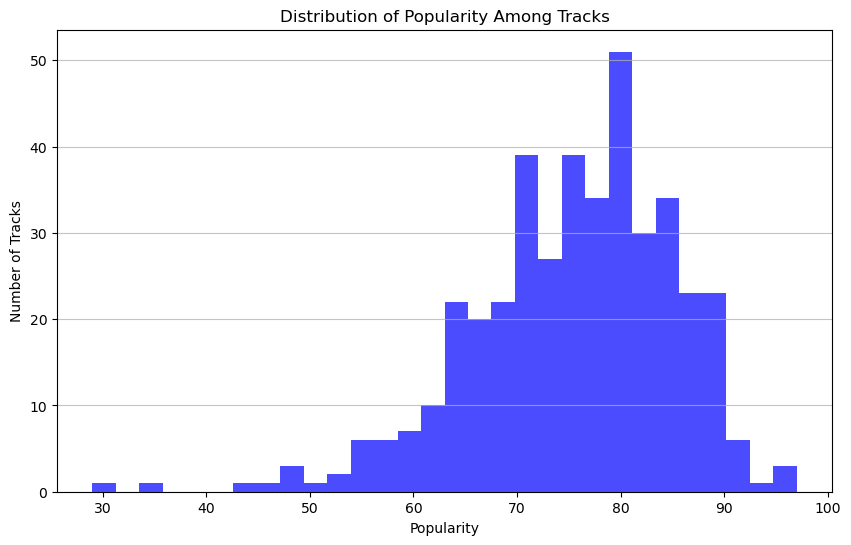

In [78]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
plt.figure(figsize=(10, 6))
plt.hist(df3['Popularity'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(axis='y', alpha=0.75)
plt.show()

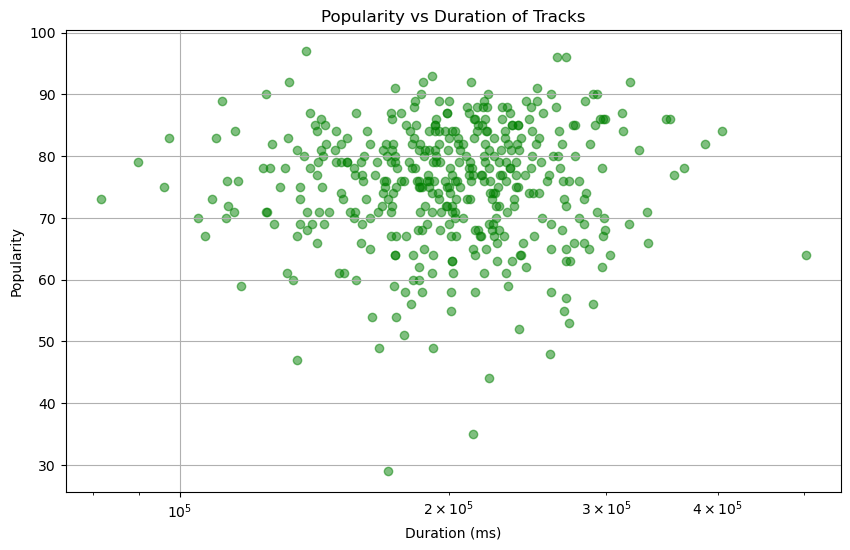

In [79]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
plt.figure(figsize=(10, 6))
plt.scatter(df3['Duration (ms)'], df3['Popularity'], alpha=0.5, color='green')
plt.title('Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.xscale('log')
plt.show()

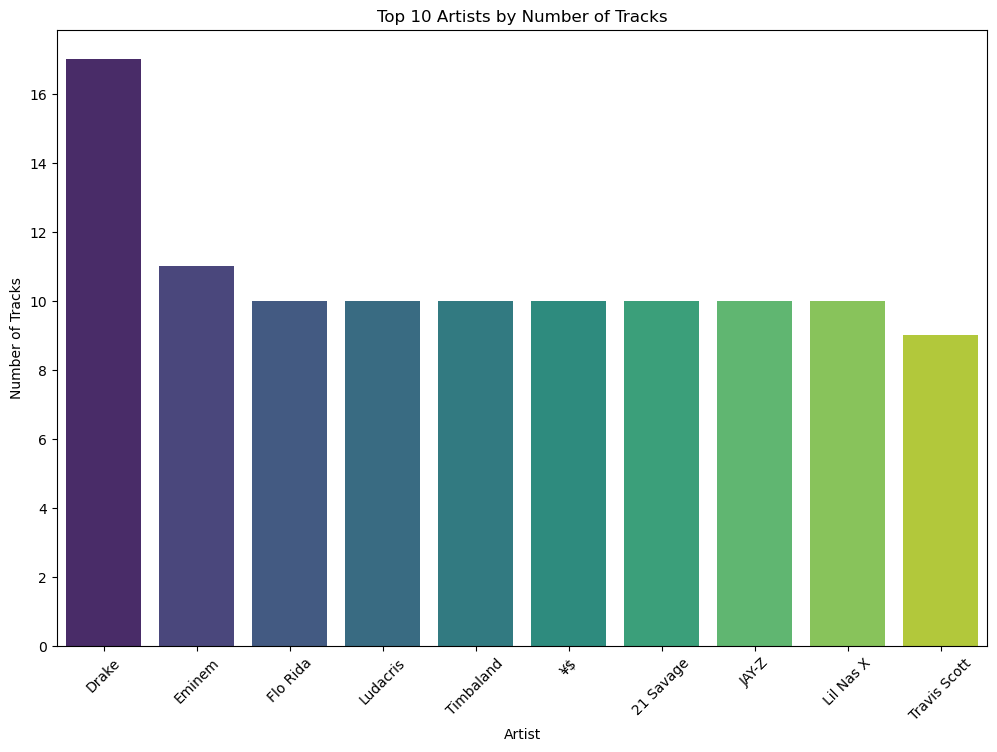

In [80]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
plt.figure(figsize=(12, 8))
artist_counts = df3['Artist'].value_counts().head(10)
sns.barplot(x=artist_counts.index, y=artist_counts.values, palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Artist')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

In [81]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
least_popular_tracks = df3.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [82]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_artists = df3['Artist'].value_counts().head(5).index
average_popularity = df3[df3['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average Popularity of Top 5 Artists:")
print(average_popularity)

Average Popularity of Top 5 Artists:
Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [83]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
top_artists_tracks = df3[df3['Artist'].isin(top_artists)].sort_values(by='Popularity', ascending=False).groupby('Artist').first().reset_index()
print("Most Popular Tracks of Top 5 Artists:")
print(top_artists_tracks[['Artist', 'Track Name', 'Popularity']])

Most Popular Tracks of Top 5 Artists:
      Artist                               Track Name  Popularity
0      Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
1     Eminem                               Without Me          90
2   Flo Rida                       Low (feat. T-Pain)          84
3   Ludacris                             My Chick Bad          67
4  Timbaland                            The Way I Are          85


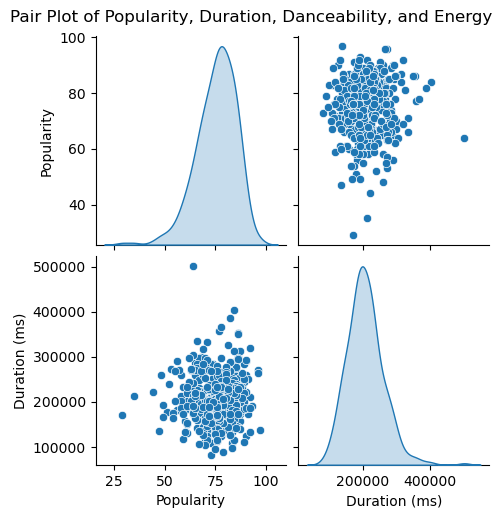

In [84]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.
sns.pairplot(df3[['Popularity', 'Duration (ms)']], diag_kind='kde')
plt.suptitle('Pair Plot of Popularity, Duration, Danceability, and Energy', y=1.02)
plt.show()

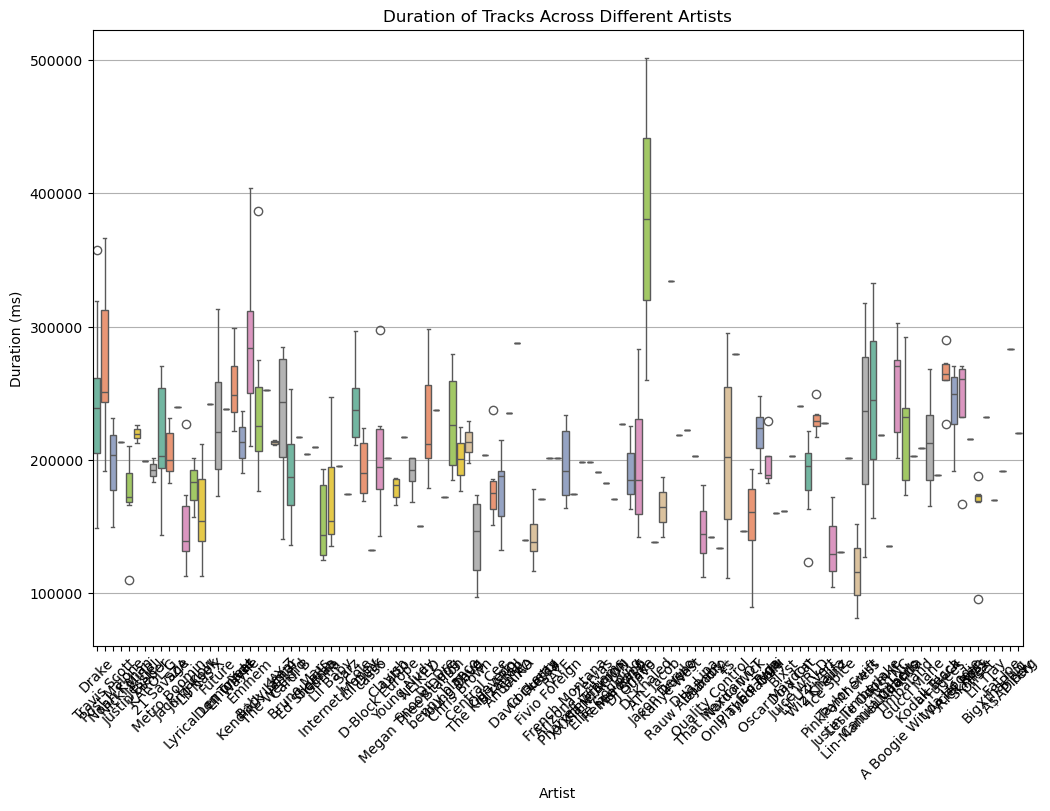

In [85]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df3, palette='Set2')
plt.title('Duration of Tracks Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

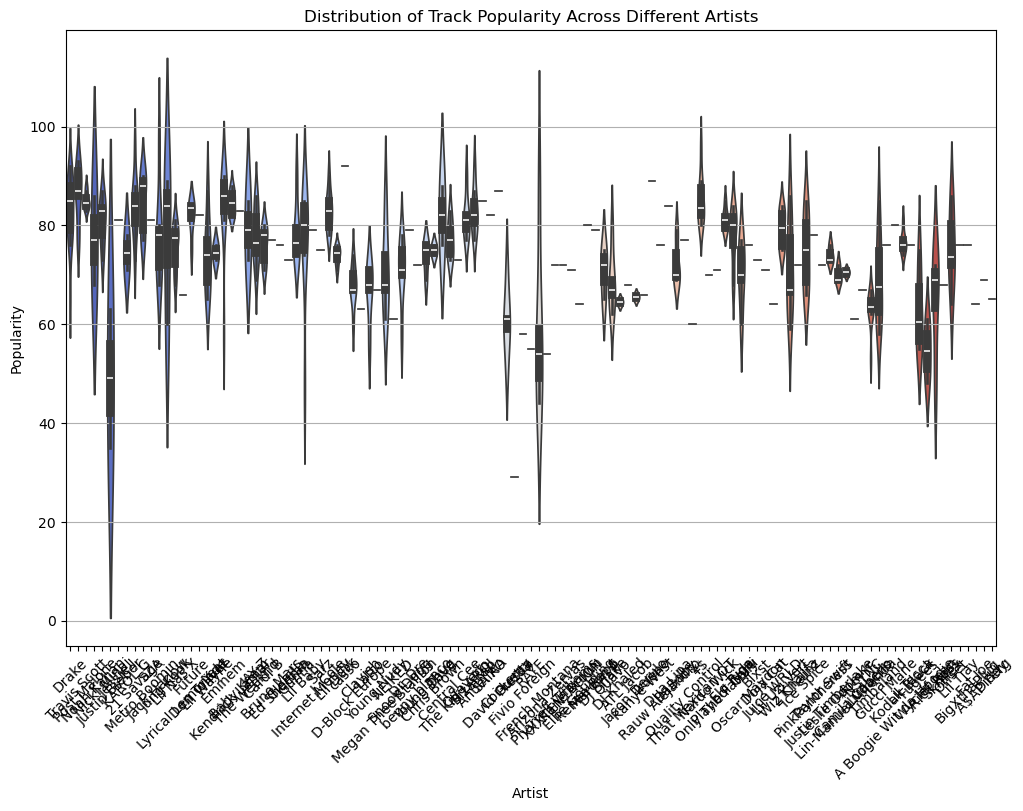

In [86]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Popularity', data=df3, palette='coolwarm')
plt.title('Distribution of Track Popularity Across Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()